## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Mar 11 11:00:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Custom Training

In [65]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=500

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/Mask-RCNN-Skin-Disease-18/data.yaml, epochs=100, patience=50, batch=16, imgsz=500, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [66]:
!ls {HOME}/runs/segment/train13/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix.png				     train_batch5760.jpg
events.out.tfevents.1678539095.5b19d4922e34.29766.0  train_batch5761.jpg
MaskF1_curve.png				     train_batch5762.jpg
MaskP_curve.png					     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskR_curve.png					     weights


/content


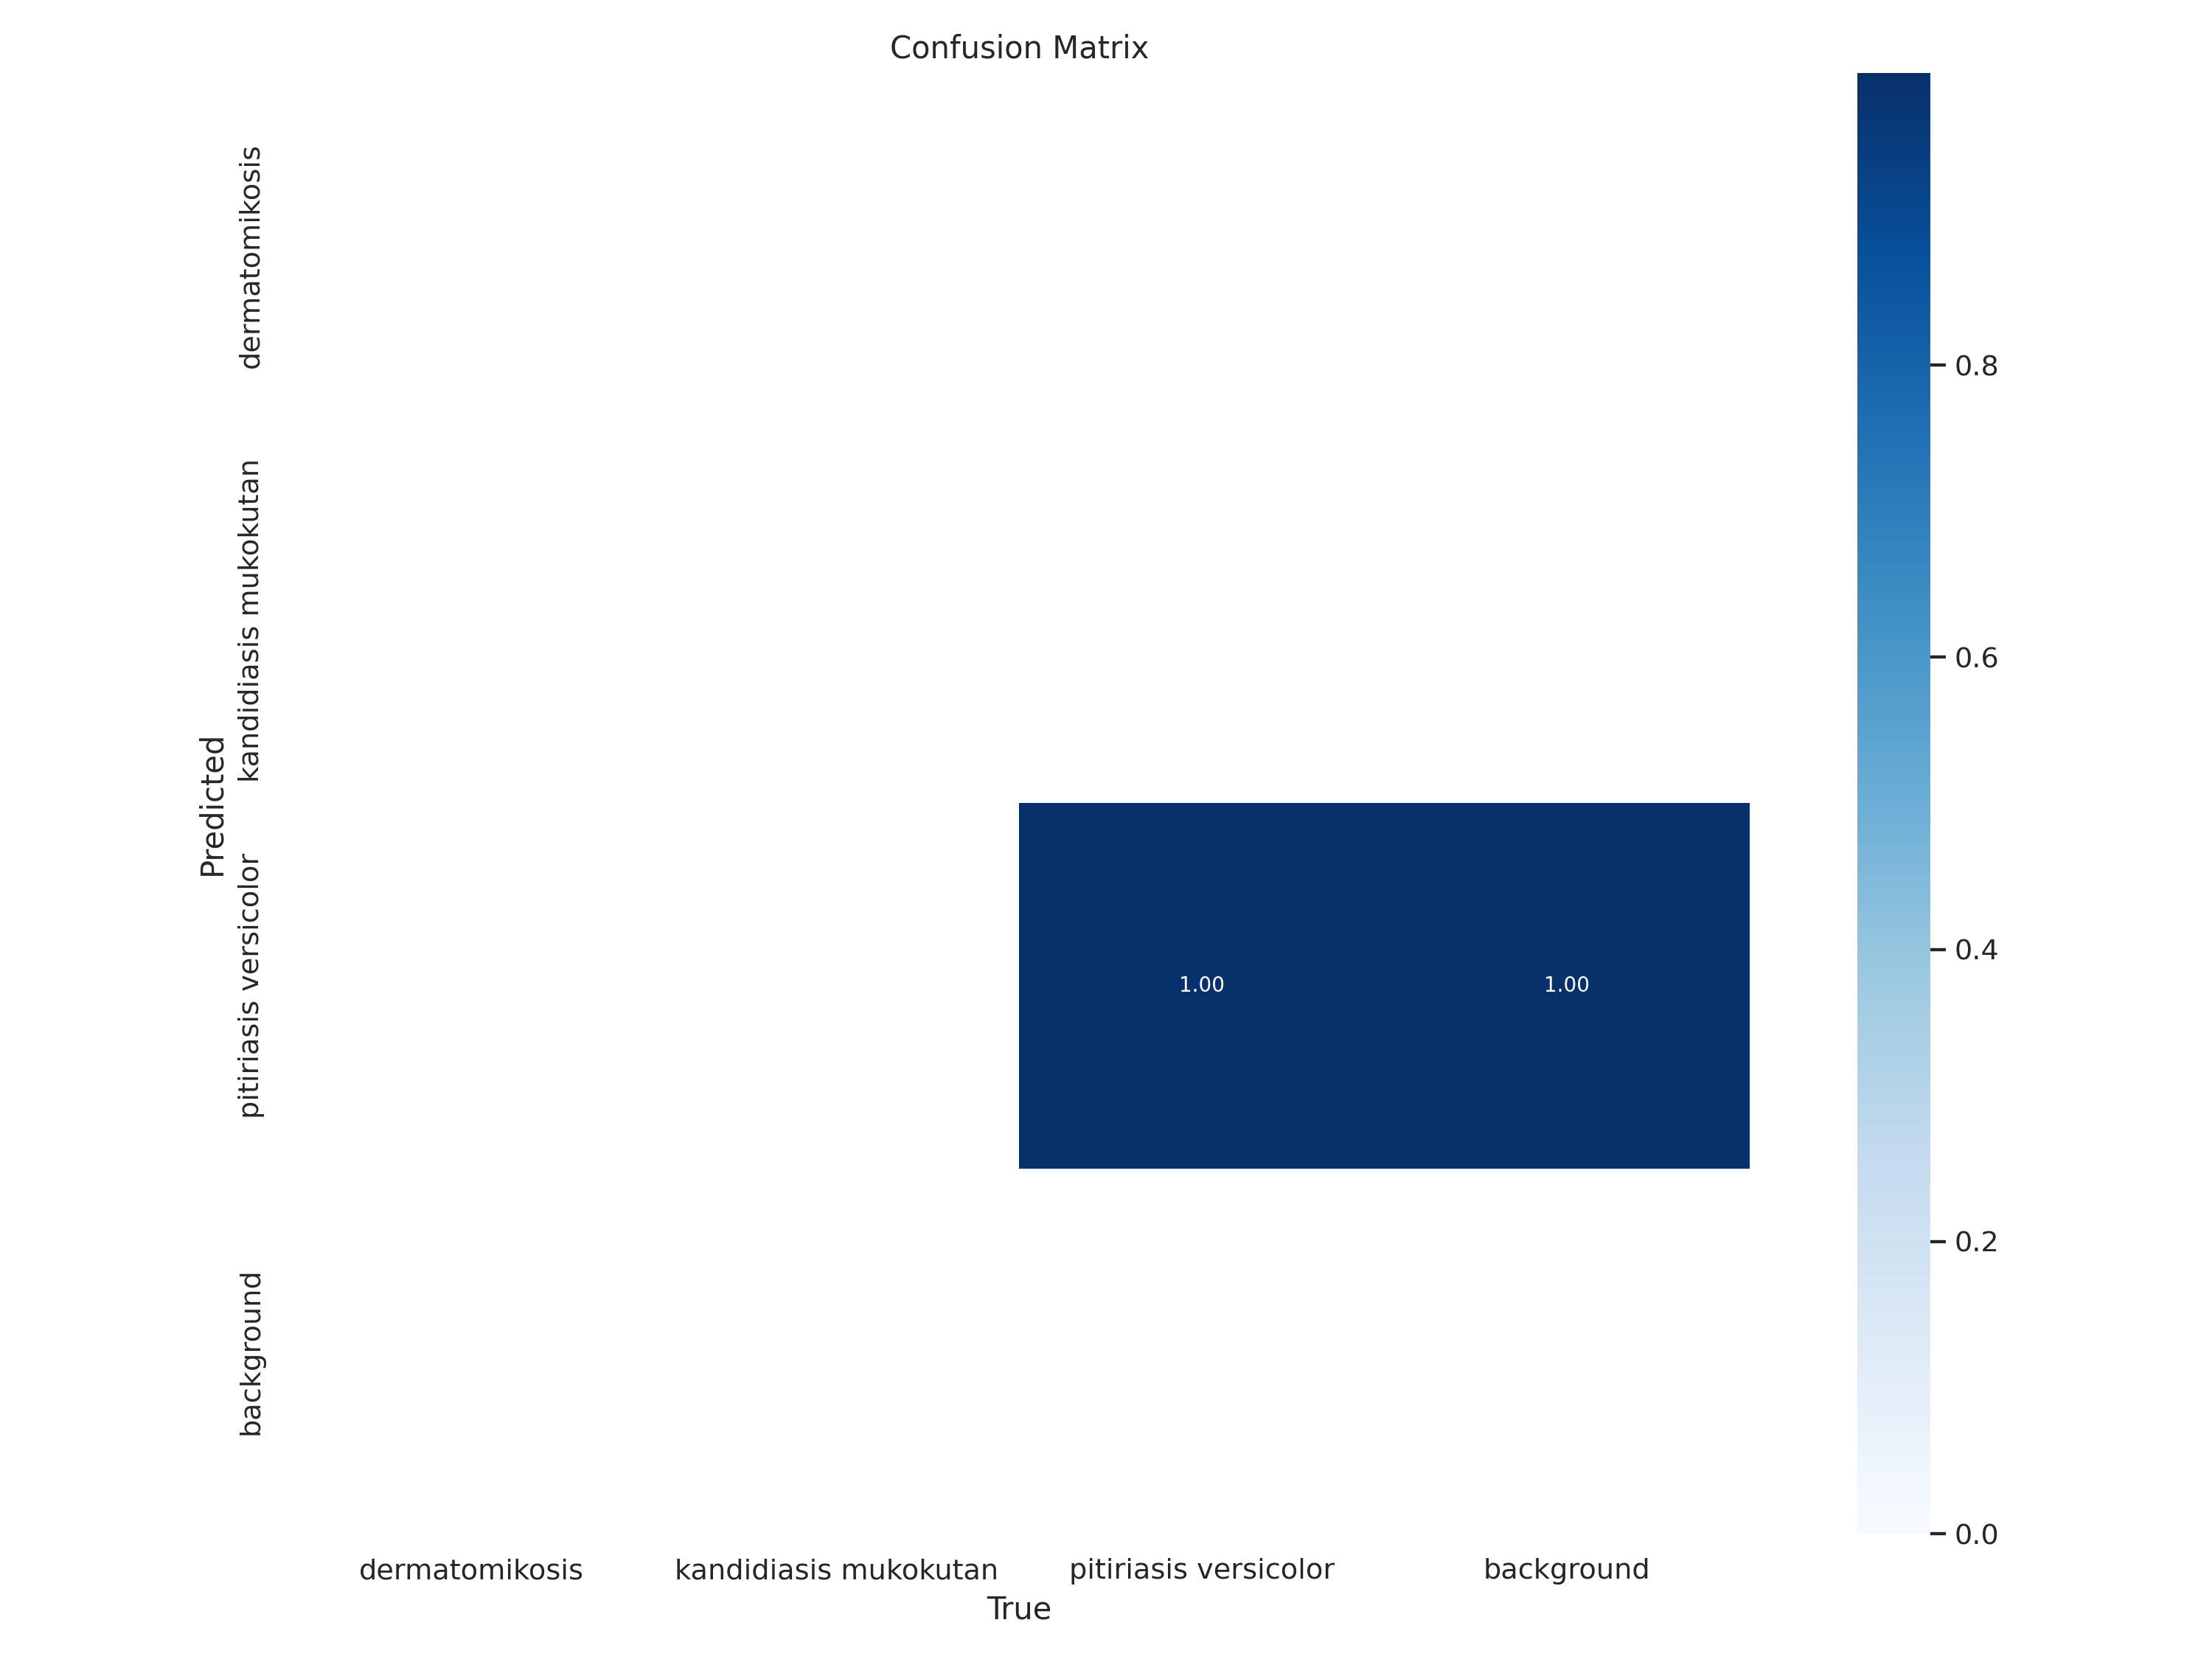

In [67]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train13/confusion_matrix.png', width=600)

/content


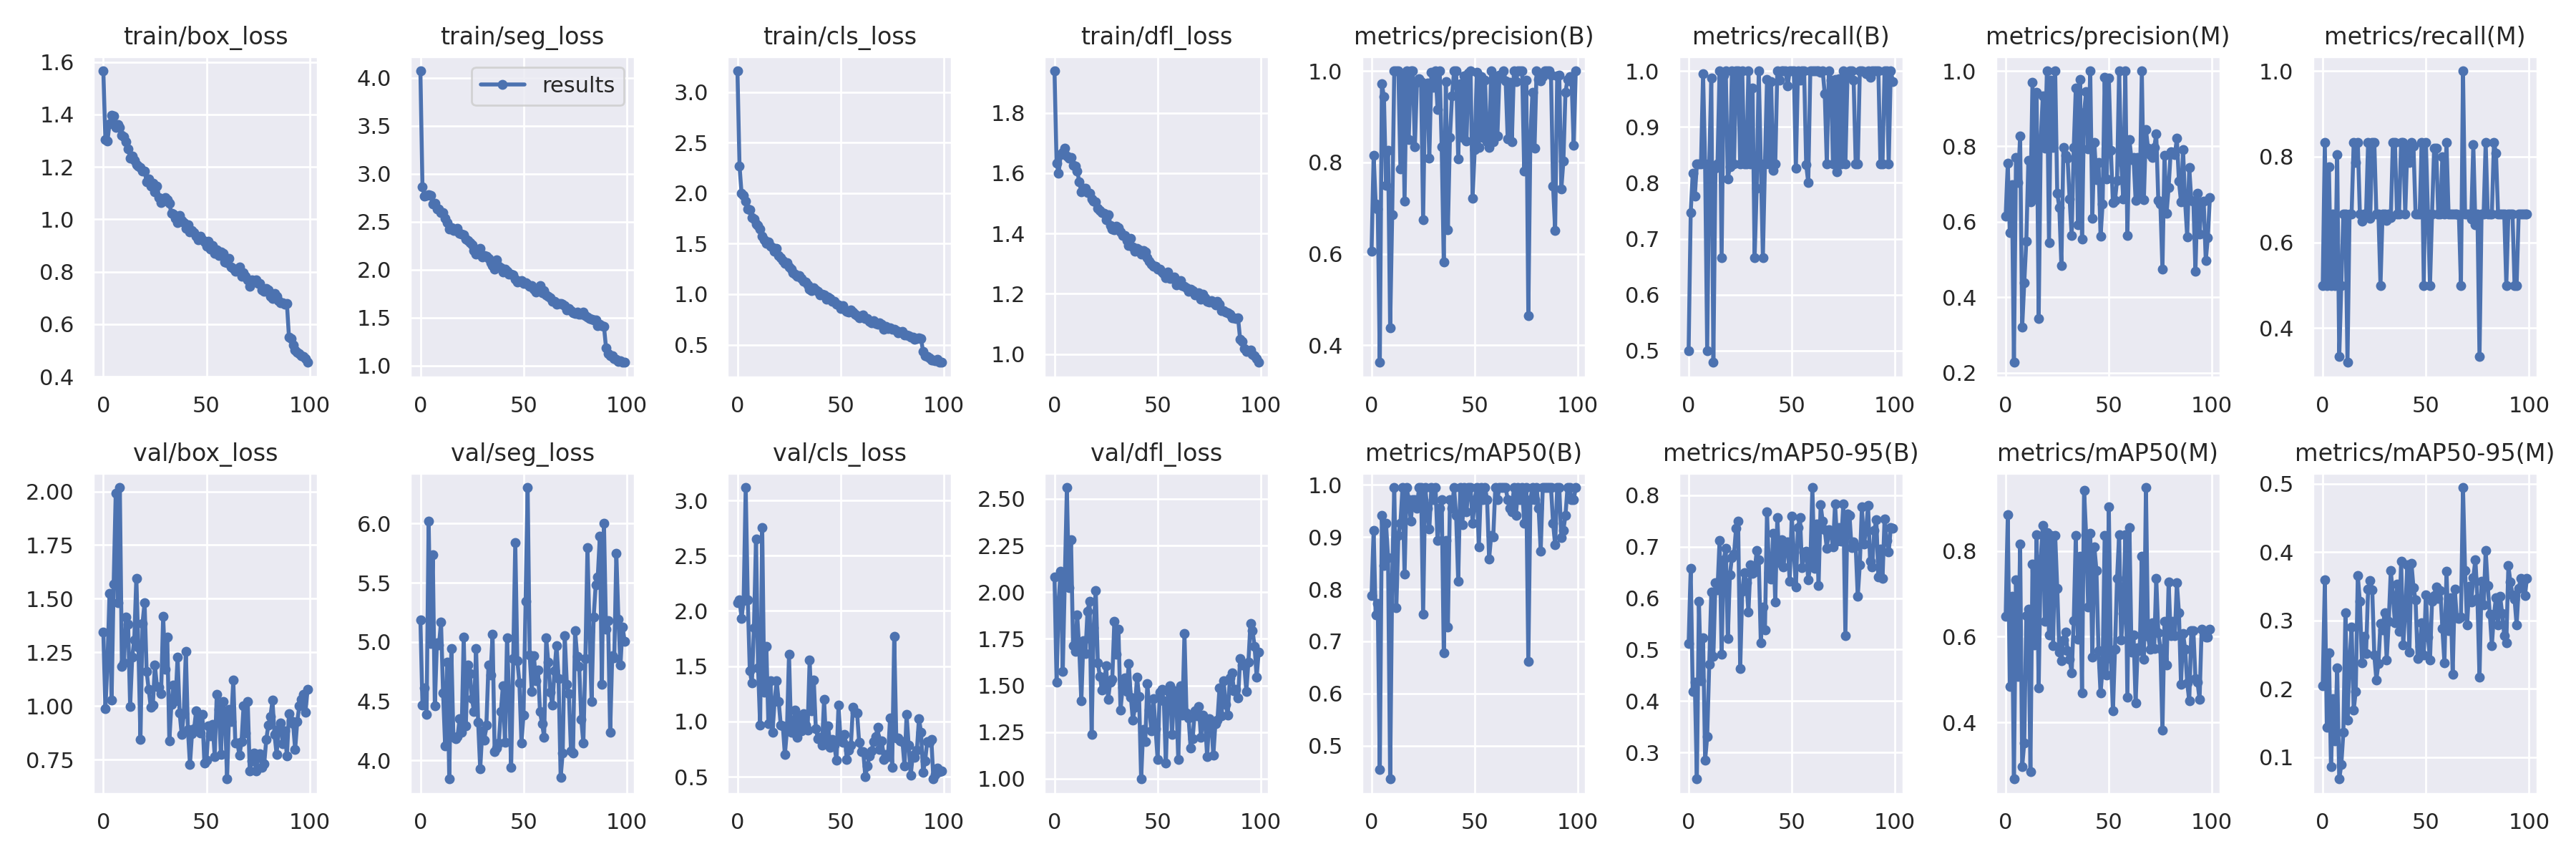

In [69]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train13/results.png', width=600)

/content


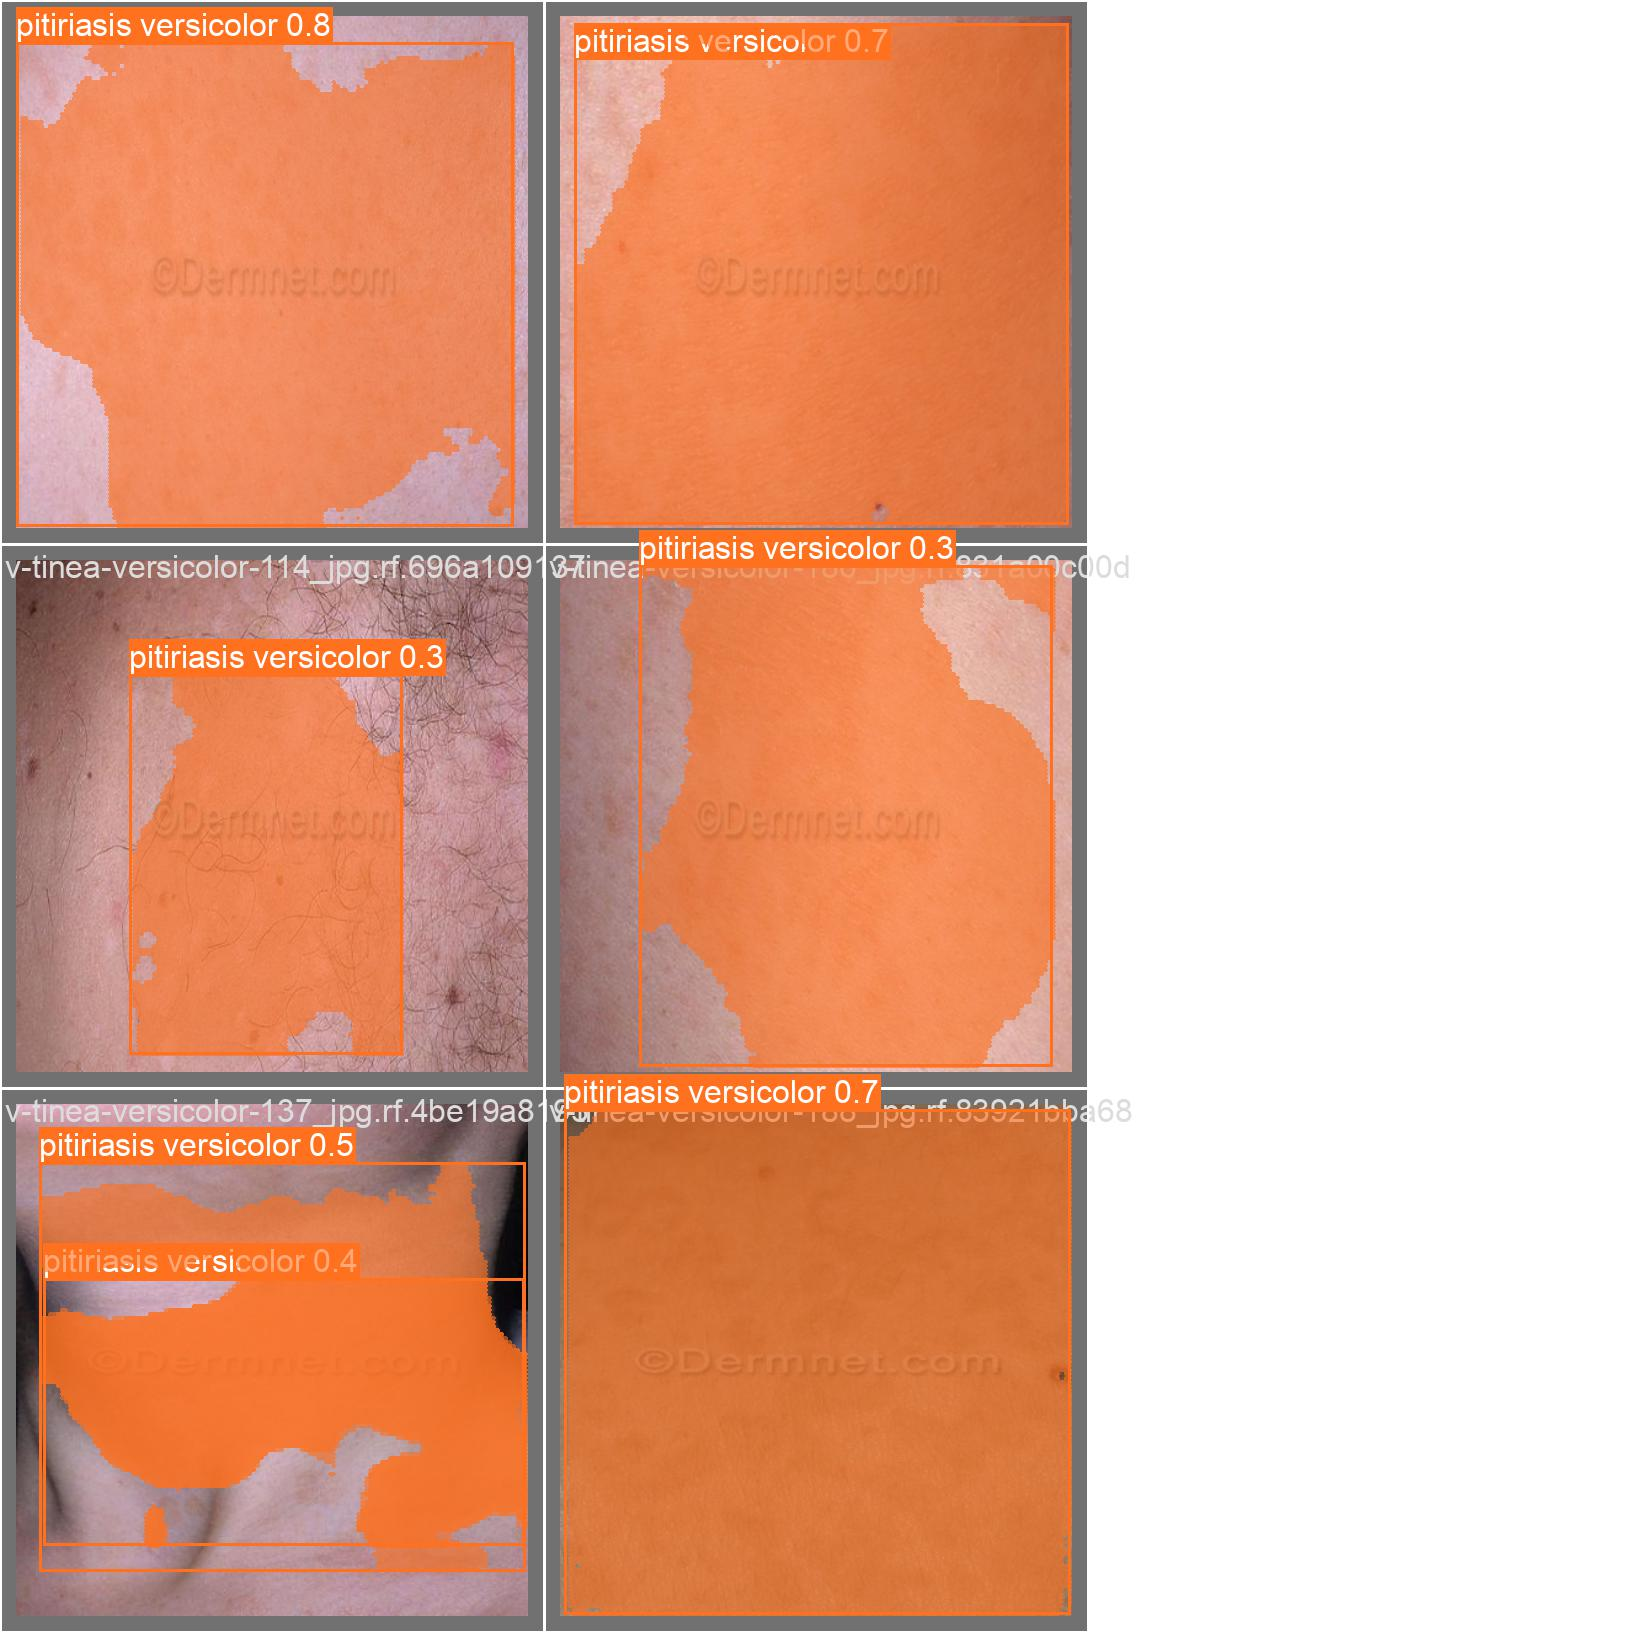

In [70]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train13/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [72]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train13/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914201 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/datasets/Mask-RCNN-Skin-Disease-18/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.15it/s]
                   all          6          6      0.836          1      0.948      0.733      0.836          1      0.948      0.495
 pitiriasis versicolor          6          6      0.836          1      0.948      0.733      0.836          1      0.948      0.495
Speed: 0.3ms pre-process, 49.4ms inference, 0.0ms loss, 1.3ms post-process per image


## Inference with Custom Model

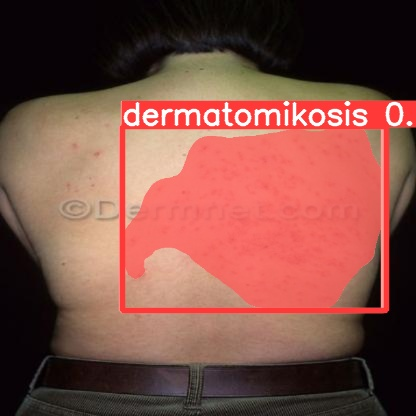

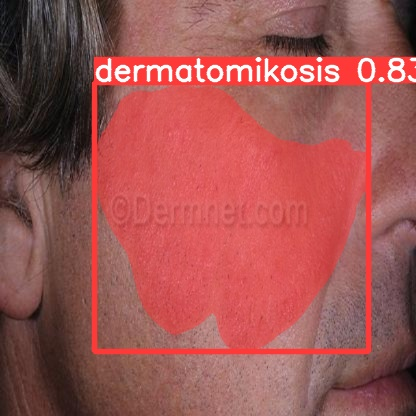

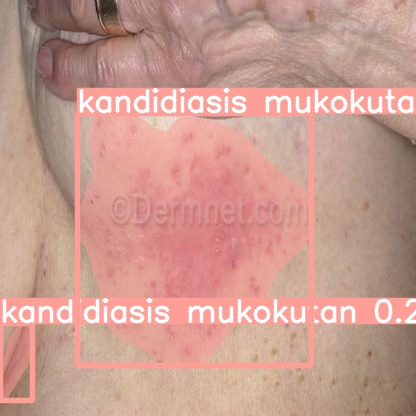

In [74]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict7/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")